## (原文節)Machine learning: the problem setting

tutorial 中から link は貼られていないが 同じ scikit-learn の Documentation 中の [Flow Chart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) がビジュアル的にわかりやすい。

- **labeled data** のノードが教師ありか教師なしかの分岐点




## (原文節)Loading an example dataset

- 機械学習お試し用データセットの取得方法実例
- irisは「植物の部位別の葉のサイズをデータ要素」，「品種判定を**label**」とするデータ。
- digitsは「8x8ピクセルのモノクロ画像をデータ要素」，「0から9の数字判定を**label**」とするデータ。



In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()




iris, digits ともに**Bunch**というtypeだがほぼPythonのdictionary同等と考えてよい。

In [8]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

よってtutorial中の`.data`のような記法同様に`['data']`も使える。

In [9]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [10]:
digits['data']

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

dataのサンプル数などを知るには`shape`をつなげて実行するとよい

In [19]:
digits.data.shape

(1797, 64)

`shape`の結果から`data`として長さ64(8x8)のアレイが1797サンプルあることがわかる。
要素の数値は黒色の濃さを示す。
濃さの範囲を知るにはnumpyのmin,maxが使える。



In [31]:
import numpy as np
np.min(digits.data)



0.0

In [32]:
np.max(digits.data)

16.0

`target` は前述の`data`の **label** に該当するピクセルデータが0から9のどの数字を表すかを示すものである

In [20]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
digits.target.shape

(1797,)

`target_names`は全`target`にどのような種類が存在しているかを示す

In [22]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
import numpy as np
np.unique(digits.target)



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`images` は 8x8 のピクセルデータをフラットな長さ64のアレイにする前の入れ子型のアレイデータである。





### (原文節)Shape of the data arrays

scikit-learnの学習器が受け付けるデータの形状が常に2次元(サンプル長x特徴量長)のアレイなので元の`images`(8x8)のアレイが`data`では長さ64のフラットなアレイにされているわけである。




In [27]:
digits.images

array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[  0.,   0., 

In [28]:
digits.images.shape

(1797, 8, 8)

`DESCR` はdescriptionの略でデータセットの說明文がここには格納されている。

In [29]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

## (原文節)Learning and predicting

`digits` データセットの場合 タスクはそのピクセルデータが0から9の何を表すかを予測することになる。

scikit-learnでは学習器を`estimator`と呼び
- `estimator`のメソッド`fit`により学習を (前述の通り受け取るデータは必ず2次元のアレイ)
- `estimator`のメソッド`predict`で予測を
行うという決まりがある。

この決まりは学習器によらず一貫されている。
そしてそのおかげで同じデータに対して学習器の差し替えが容易に行えるようになっている。



チュートリアルでは`estimator`の実例として `sklearn.svm.SVC` を用いている。
これはサポートベクターマシン分類器を実装したものである。




In [34]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)



`estimator`のコンストラクタは引数としてこれから構築する「モデル」のためのパラメータを取る。
ここでは`gamma`と`C`がそのパラメータである。
ここで初めて出る「モデル」という用語が示すものは「学習データをestimatorに与えた後にできあがるobject」に等しい。
つまりここでは`clf`が「モデル」に相当する。



In [39]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
clf.predict(digits.data[-1:])

array([8])

In [41]:
digits.data[-1:]

array([[  0.,   0.,  10.,  14.,   8.,   1.,   0.,   0.,   0.,   2.,  16.,
         14.,   6.,   1.,   0.,   0.,   0.,   0.,  15.,  15.,   8.,  15.,
          0.,   0.,   0.,   0.,   5.,  16.,  16.,  10.,   0.,   0.,   0.,
          0.,  12.,  15.,  15.,  12.,   0.,   0.,   0.,   4.,  16.,   6.,
          4.,  16.,   6.,   0.,   0.,   8.,  16.,  10.,   8.,  16.,   8.,
          0.,   0.,   1.,   8.,  12.,  14.,  12.,   1.,   0.]])

In [42]:
%matplotlib inline

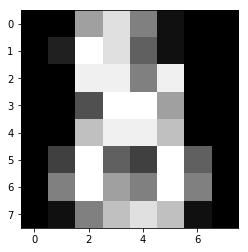

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.imshow(digits.data[-1:].reshape((8,8)), cmap=cm.gray)

In [58]:
clf = svm.SVC()
iris = datasets.load_iris()

In [59]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [64]:
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [61]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [67]:
X, y = iris.data, iris.target

In [72]:
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
import pickle

In [74]:
s = pickle.dumps(clf)

In [75]:
clf2 = pickle.loads(s)

In [77]:
clf2.predict(X[0:1])

array([0])

In [78]:
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl') 

['filename.pkl']

In [79]:
clf = joblib.load('filename.pkl')

In [ ]:
jobli

In [82]:
!ls -lh

total 8.0K
lrwxrwxrwx 1 nbuser nbuser   28 Jun 30 01:58 anaconda2_410 -> /home/nbcommon/anaconda2_410
lrwxrwxrwx 1 nbuser nbuser   28 Jun 30 01:58 anaconda3_410 -> /home/nbcommon/anaconda3_410
lrwxrwxrwx 1 nbuser nbuser   28 Jun 30 01:58 anaconda3_431 -> /home/nbcommon/anaconda3_431
-rw-r--r-- 1 nbuser nbuser 4.5K Jul  2 05:54 filename.pkl


In [83]:
import numpy as np
from sklearn import random_projection

In [84]:
rng = np.random.RandomState(0)
X = rng.rand(10, 2000)

In [89]:
np.max(X)

0.9999779517807228

In [90]:
X.shape

(10, 2000)

In [94]:
X.dtype

dtype('float64')

In [95]:
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [96]:
transformer = random_projection.GaussianRandomProjection()

In [97]:
X_new = transformer.fit_transform(X)

In [99]:
X_new.shape

(10, 1973)

In [100]:
X_new.dtype

dtype('float64')

In [102]:
from sklearn.svm import SVC

In [103]:
clf.fit(iris.data, iris.target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [108]:
np.allclose(clf.predict(iris.data), iris.target)

False

In [109]:
clf.score(iris.data, iris.target)

0.98666666666666669

In [111]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [110]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [112]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

In [115]:
rng = np.random.RandomState(0)

In [116]:
X = rng.rand(100, 10)

In [119]:
X

array([[  5.48813504e-01,   7.15189366e-01,   6.02763376e-01,
          5.44883183e-01,   4.23654799e-01,   6.45894113e-01,
          4.37587211e-01,   8.91773001e-01,   9.63662761e-01,
          3.83441519e-01],
       [  7.91725038e-01,   5.28894920e-01,   5.68044561e-01,
          9.25596638e-01,   7.10360582e-02,   8.71292997e-02,
          2.02183974e-02,   8.32619846e-01,   7.78156751e-01,
          8.70012148e-01],
       [  9.78618342e-01,   7.99158564e-01,   4.61479362e-01,
          7.80529176e-01,   1.18274426e-01,   6.39921021e-01,
          1.43353287e-01,   9.44668917e-01,   5.21848322e-01,
          4.14661940e-01],
       [  2.64555612e-01,   7.74233689e-01,   4.56150332e-01,
          5.68433949e-01,   1.87898004e-02,   6.17635497e-01,
          6.12095723e-01,   6.16933997e-01,   9.43748079e-01,
          6.81820299e-01],
       [  3.59507901e-01,   4.37031954e-01,   6.97631196e-01,
          6.02254716e-02,   6.66766715e-01,   6.70637870e-01,
          2.10382561e-01

In [127]:
y = rng.binomial(1, 0.5, 100)

In [128]:
y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1])

In [131]:
X_test = rng.rand(5, 10)

In [132]:
X_test

array([[ 0.83564604,  0.483459  ,  0.88118825,  0.91641901,  0.2715511 ,
         0.60754536,  0.52658403,  0.53794578,  0.93766309,  0.3051887 ],
       [ 0.98343398,  0.90213121,  0.45872289,  0.81745326,  0.76904699,
         0.67789497,  0.31983389,  0.19645099,  0.6715277 ,  0.8429733 ],
       [ 0.01625279,  0.64280338,  0.44287302,  0.89808776,  0.32147293,
         0.47418481,  0.5147671 ,  0.14043952,  0.7128923 ,  0.83047635],
       [ 0.05790928,  0.29138882,  0.03804468,  0.9565441 ,  0.66716882,
         0.96420042,  0.53149428,  0.80206852,  0.37441398,  0.35381903],
       [ 0.37826782,  0.65786213,  0.35945315,  0.90036745,  0.98327487,
         0.03042652,  0.19362329,  0.11224999,  0.04236405,  0.22774099]])

In [133]:
rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)
clf = SVC()
clf.set_params(kernel='linear').fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [135]:
clf.set_params(kernel='rbf').fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [136]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

In [137]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

In [144]:
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

In [145]:
classif = OneVsRestClassifier(estimator=SVC(random_state=0))

In [146]:
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [147]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [149]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])